In [1]:
#Importando ROOT e o arquivo de dados
import ROOT

fInput = ROOT.TFile("Data/DataSet_lowstat.root")
dataset = fInput.Get("data")

Welcome to JupyROOT 6.24/04

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
# Inicializando as variáveis e parâmetros para a ressonância jpsi

mass = ROOT.RooRealVar("mass","mass",2.,6.,"GeV")
meanJpsi = ROOT.RooRealVar("meanJpsi","meanJpsi",3.1,2.8,3.2)
sigmaJpsi = ROOT.RooRealVar("sigmaJpsi","sigmaJpsi",0.3,0.0001,1.)
alphaJpsi = ROOT.RooRealVar("alphaJpsi","alphaJpsi",1.5,-5.,5.)
nJpsi = ROOT.RooRealVar("nJpsi","nJpsi",1.5,0.5,5.)

# Criando a pdf
CBJpsi = ROOT.RooCBShape("CBJpsi","Crystal Ball de Jpsi",mass,meanJpsi,sigmaJpsi,alphaJpsi,nJpsi)

In [3]:
# Inicializando as variáveis e parâmetros para a ressonância psi 2s
meanpsi2S = ROOT.RooRealVar("meanpsi2S","meanpsi2S",3.7,3.65,3.75)

# Criando a pdf gaussiana (similar a crystall ball)
gausspsi2S = ROOT.RooGaussian("gausspsi2S","gausspsi2S",mass,meanpsi2S,sigmaJpsi)

In [4]:
#Inicializando as variáveis do background
a1 = ROOT.RooRealVar("a1","a1",-0.7,-2.,2.)
a2 = ROOT.RooRealVar("a2","a2",0.3,-2.,2.)
a3 = ROOT.RooRealVar("a3","a3",-0.03,-2.,2.)

# Criando a PDF
backgroundPDF = ROOT.RooChebychev("backgroundPDF","backgroundPDF",mass,ROOT.RooArgList(a1,a2,a3))

In [5]:
# Inicializando os pesos das PDFs 
NJpsi = ROOT.RooRealVar("NJpsi","NJpsi",1500.,0.1,10000.)
Nbkg = ROOT.RooRealVar("Nbkg","Nbkg",5000.,0.1,50000.)
Npsi = ROOT.RooRealVar("Npsi","Npsi",100.,0.1,5000.)

In [6]:
#Compondo a PDF total usando as pdfs anteriores e seus pesos
totPDF = ROOT.RooAddPdf("totPDF","totPDF",ROOT.RooArgList(CBJpsi,gausspsi2S,backgroundPDF),ROOT.RooArgList(NJpsi,Npsi,Nbkg))

In [7]:
# Fitando
totPDF.fitTo(dataset, ROOT.RooFit.Extended(1))

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (CBJpsi,gausspsi2S,backgroundPDF)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 NJpsi        1.50000e+03  7.49950e+02    1.00000e-01  1.00000e+04
     2 Nbkg         5.00000e+03  2.49995e+03    1.00000e-01  5.00000e+04
     3 Npsi         1.00000e+02  4.99500e+01    1.00000e-01  5.00000e+03
     4 a1          -7.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     5 a2           3.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     6 a3          -3.00000e-02  4.00000e-01   -2.00000e+00  2.00000e+00
     7 alphaJpsi    1.50000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     8 meanJpsi     3.10000e+00  4.00000e-02    2.80000e+00  3.20000e+00
     9 meanpsi2S    3.

In [8]:
#Printando os valores ajustados
print ("##############")
meanpsi2S.Print()
NJpsi.Print()
Npsi.Print()
print ("##############")

##############
##############
RooRealVar::meanpsi2S = 3.69542 +/- 0.0259109  L(3.65 - 3.75) 
RooRealVar::NJpsi = 155.596 +/- 18.7984  L(0.1 - 10000) 
RooRealVar::Npsi = 4.61864 +/- 3.96424  L(0.1 - 5000) 


Info in <TCanvas::Print>: png file plot_ex2.png has been created


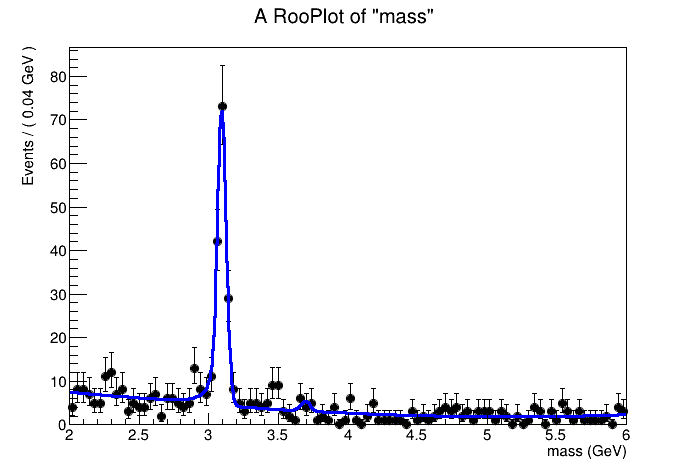

In [9]:
#Plotando
xframe = mass.frame()
dataset.plotOn(xframe)
totPDF.plotOn(xframe)
c1 = ROOT.TCanvas()
xframe.Draw()
c1.Draw()

# Salvando o plot
c1.SaveAs("plot_ex2.png")

In [10]:
# Salvando o ws
fOutput = ROOT.TFile("ws_ex2.root","RECREATE")
fInput.cd()
ws = ROOT.RooWorkspace("ws") 
getattr(ws,'import')(totPDF)
getattr(ws,'import')(dataset)
ws.writeToFile("ws_ex2.root")
del ws

fOutput.Write()
fOutput.Close()

[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooAddPdf::totPDF
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooCBShape::CBJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::mass
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::meanJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::sigmaJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::alphaJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::nJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::NJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooGaussian::gausspsi2S
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::meanpsi2S
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::Npsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooChebychev::backgroundPD